In [1]:
%matplotlib inline

In [21]:
import matplotlib.pyplot as plt
import networkx as nx
from networkx.algorithms.isomorphism import DiGraphMatcher
import time
import numpy as np

from simple import find_motifs

In [22]:
motif = nx.DiGraph()
motif.add_edge("A", "B")
motif.add_edge("B", "C")
motif.add_edge("C", "D")
motif.add_edge("D", "A")

In [23]:
def get_time_to_find_motifs(host, motif, k=5):
    times = []
    for i in range(k):
        tic = time.time()
        [i for i in find_motifs(motif, host)]
        times.append(time.time() - tic)

    gi_time = np.mean(times)

    times = []
    for i in range(k):
        tic = time.time()
        gm = DiGraphMatcher(host, motif)
        [i for i in gm.subgraph_monomorphisms_iter()]
        times.append(time.time() - tic)

    nx_time = np.mean(times)

    return (gi_time, nx_time)

In [33]:
# results = {}

for n in [70, 60, 40]:
    host = nx.fast_gnp_random_graph(n, 0.2, directed=True)

    len_e = len(host.edges())

    results[len_e] = get_time_to_find_motifs(host, motif, k=2)

In [34]:
results

# results = {1972: (0.7858007907867431, 21.136102056503297),
#  696: (0.1390388011932373, 2.244188117980957),
#  183: (0.019361400604248048, 0.1702702522277832),
#  86: (0.006795501708984375, 0.0443540096282959),
#  25: (0.0013312339782714845, 0.004622554779052735),
#  990: (0.25644397735595703, 4.836061477661133),
#  689: (0.13494586944580078, 2.2605091333389282),
#  328: (0.043376922607421875, 0.5011695623397827)}

{1972: (0.7858007907867431, 21.136102056503297),
 696: (0.1390388011932373, 2.244188117980957),
 183: (0.019361400604248048, 0.1702702522277832),
 86: (0.006795501708984375, 0.0443540096282959),
 25: (0.0013312339782714845, 0.004622554779052735),
 990: (0.25644397735595703, 4.836061477661133),
 689: (0.13494586944580078, 2.2605091333389282),
 328: (0.043376922607421875, 0.5011695623397827)}

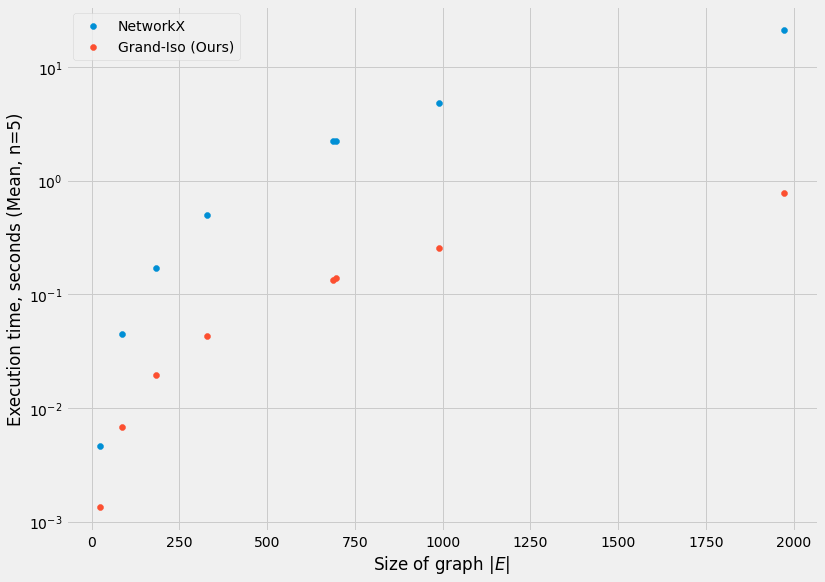

In [48]:
with plt.style.context("fivethirtyeight"):
    plt.figure(figsize=(12, 9))

    plt.scatter(
        [e for e, v in results.items()],
        [v[1] for e, v in results.items()],
        label="NetworkX"
    )

    plt.scatter(
        [e for e, v in results.items()],
        [v[0] for e, v in results.items()],
        label="Grand-Iso (Ours)"
    )

    plt.ylabel("Execution time, seconds (Mean, n=5)")
    plt.xlabel("Size of graph $|E|$")

    # plt.yscale("log")

    plt.legend()

    plt.savefig("Compare-Nx.png")
